**Problema No. 1**

Supongamos que queremos maximizar una función de valor real.

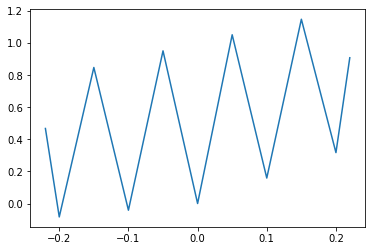

In [128]:
import random as rd
import matplotlib.pyplot as plt
import math


# Objective function
def obj_function(x):
    return x + abs(math.sin(32 * x))


def plot_func():
    x_points = [-0.22, -0.20, -0.15, -0.10, -0.05, 0, 0.05, 0.10, 0.15, 0.20, 0.22]
    #x_points = [k * 0.1 for k in range(-20, 20, 5)]
    y_points = [obj_function(x) for x in x_points]
    plt.plot(x_points, y_points)
    plt.show()


plot_func()


In [0]:
# Generate initial random population.
def generate_population(size, lower_boundary, upper_boundary):
    population = []
    for i in range(size):
        chromosome = rd.uniform(lower_boundary, upper_boundary)
        population.append(chromosome)
    return population

**Operadores Genéticos**



*   Recombinación: definida como el promedio aritmético de dos números.



In [0]:
def crossover(chromosome_a, chromosome_b):
    child = (chromosome_a + chromosome_b) / 2
    return child



*   Mutación: altera el número sumándole un número aleatorio distribuido uniformemente.



In [0]:
def mutate(chromosome):
    mutated_chromosome = chromosome + rd.uniform(-0.05, 0.05)
    mutated_chromosome = min(max(mutated_chromosome, -0.2), 0.2)
    return mutated_chromosome



*   Selección: selección por ruleta, en dónde la probabilidad de escogencia de un inividuo es proporcional a su adaptación. https://hackernoon.com/genetic-algorithms-explained-a-python-implementation-sd4w374i




In [0]:
def selection_by_roulette(sorted_population, fitness_sum):
    offset = 0
    normalized_fitness_sum = fitness_sum

    lowest_fitness = obj_function(sorted_population[0])
    if lowest_fitness < 0:
        offset = - lowest_fitness
        normalized_fitness_sum += offset * len(sorted_population)

    draw = rd.uniform(0, 1)
    accumulated = 0

    for chromosome in sorted_population:
        fitness = obj_function(chromosome) + offset
        probability = fitness / normalized_fitness_sum
        accumulated += probability

        if draw <= accumulated:
            return chromosome

Probamos algoritmo

In [0]:
def sort_population(population):
    return sorted(population, key = obj_function)


def get_next_generation(previous_population):
    next_generation = []
    sorted_by_fitness_population = sort_population(previous_population)
    population_size = len(previous_population)
    fitness_sum = sum(obj_function(chromosome) for chromosome in previous_population)

    for i in range(population_size):
        first_choice = selection_by_roulette(sorted_by_fitness_population, fitness_sum)
        #print('--------------------')
        #print(i, ' first_choice: ', first_choice)
        second_choice = selection_by_roulette(sorted_by_fitness_population, fitness_sum)
        #print(i, ' second_choice: ', second_choice)
        offspring = crossover(first_choice, second_choice)
        #print(i, ' offspring: ', offspring)
        offspring = mutate(offspring)
        #print(i, ' mut offspring: ', offspring)
        next_generation.append(offspring)

    return next_generation




generations = 100
population = generate_population(10, -0.2, 0.2)
i = 1

while i <= generations:
    print('generation: %s' % i)
    for individual in population:
        print(individual, obj_function(individual))
    if i == generations:
        break
    population = get_next_generation(population)
    i += 1
    

best_individual = sort_population(population)[-1]
print('pop: ', sort_population(population))
print('final result')
print(best_individual, obj_function(best_individual))

**Problema No. 2**

Identificar los mejores hiperparámetros para un modelo de regresión logística múltiple.

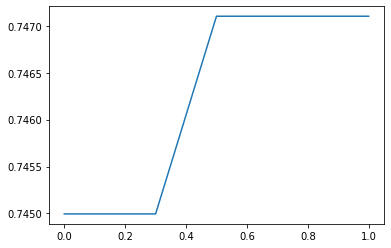

In [137]:
import pandas as pd
from sklearn import preprocessing as ppr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

dataset_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSylhACMKjuLcz9M7DPkYkAALJMACaSsryKpfbL3IY149_8tfVi0z61Dcg4M267ZaXM-x3MNI-EyoJC/pub?gid=0&single=true&output=csv'

df = pd.read_csv(dataset_url)

""" --- Preprocessing --- """

# Remove some columns
df.drop(['Carrera', 
         'Semestre', 
         'AsignaturasCursadas', 
         'AsignaturasAprobadas'], 
        axis = 1,
        inplace = True)

# Normalize attributes
df[['Edad', 
    'CreditosCursados', 
    'CreditosAprobados', 
    'PromedioUltimoPeriodo',
    'PromedioAcumulado',
    'Duracion']] = ppr.StandardScaler().fit_transform(
        df[['Edad',
            'CreditosCursados', 
            'CreditosAprobados', 
            'PromedioUltimoPeriodo', 
            'PromedioAcumulado', 
            'Duracion']])
    
# One-hot encoder for sex
df['Sexo'] = ppr.LabelEncoder().fit_transform(df['Sexo'])

df.head(10)

# Split the data between test and train
y = df['Estado']
x = df.drop('Estado', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)



# clf = LogisticRegression(random_state = 0, penalty = '12').fit(x_train, y_train)

def classifier_model(alpha):
    clf = RidgeClassifier(alpha).fit(x_train, y_train)
    predictions = clf.predict(x_test)
    return accuracy_score(y_test,predictions)

classifier_model(alpha=0.5)

def plot_func2():
    x_points = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    #x_points = [k * 0.1 for k in range(-20, 20, 5)]
    y_points = [classifier_model(x) for x in x_points]
    plt.plot(x_points, y_points)
    plt.show()


plot_func2()


In [135]:
print("\n=====Confusion Matrix (Ridge):=====\n")
print(confusion_matrix(y_test,predictions))

print("\n=====Classification Report (Ridge):=====\n")
print(classification_report(y_test,predictions))


=====Confusion Matrix (Ridge):=====

[[287  41  56]
 [ 74 226  19]
 [ 12  38 196]]

=====Classification Report (Ridge):=====

              precision    recall  f1-score   support

      ACTIVO       0.77      0.75      0.76       384
    DESERTOR       0.74      0.71      0.72       319
    GRADUADO       0.72      0.80      0.76       246

    accuracy                           0.75       949
   macro avg       0.74      0.75      0.75       949
weighted avg       0.75      0.75      0.75       949



In [139]:
def mutate2(chromosome, lower_boundary, upper_boundary):
    mutated_chromosome = chromosome + rd.uniform(-0.05, 0.05)
    mutated_chromosome = min(max(mutated_chromosome, lower_boundary), upper_boundary)
    return mutated_chromosome

def selection_by_roulette2(sorted_population, fitness_sum, objective_function):
    offset = 0
    normalized_fitness_sum = fitness_sum

    lowest_fitness = obj_function(sorted_population[0])
    if lowest_fitness < 0:
        offset = - lowest_fitness
        normalized_fitness_sum += offset * len(sorted_population)

    draw = rd.uniform(0, 1)
    accumulated = 0

    for chromosome in sorted_population:
        fitness = objective_function(chromosome) + offset
        probability = fitness / normalized_fitness_sum
        accumulated += probability

        if draw <= accumulated:
            return chromosome

def sort_population(population):
    return sorted(population, key = obj_function)


def get_next_generation2(previous_population, lower_boundary, upper_boundary, objective_function):
    next_generation = []
    sorted_by_fitness_population = sort_population(previous_population)
    population_size = len(previous_population)
    fitness_sum = sum(objective_function(chromosome) for chromosome in previous_population)

    for i in range(population_size):
        first_choice = selection_by_roulette2(sorted_by_fitness_population, fitness_sum, objective_function)
        second_choice = selection_by_roulette2(sorted_by_fitness_population, fitness_sum, objective_function)
        offspring = crossover(first_choice, second_choice)
        offspring = mutate2(offspring, lower_boundary, upper_boundary)
        next_generation.append(offspring)

    return next_generation


def evolve(objective_function, generations, lower_boundary, upper_boundary, population_size):
    population = generate_population(population_size, lower_boundary, upper_boundary)
    i = 1

    while i <= generations:
        print('generation: %s' % i)
        for individual in population:
            print(individual, obj_function(individual))
        if i == generations:
            break
        population = get_next_generation2(population, lower_boundary, upper_boundary, objective_function)
        i += 1

    best_individual = sort_population(population)[-1]
    print('final result')
    print(best_individual, obj_function(best_individual))

evolve(objective_function = classifier_model,
       generations = 100, 
       lower_boundary = 0.0,
       upper_boundary = 1.0,
       population_size = 10)


generation: 1
0.605849650600042 1.1179539195287802
0.9904688746386194 1.265937786470654
0.8778678898811257 1.0594168965110573
0.41434058671362894 1.052825566308651
0.8025534125793834 1.3243605356906873
0.16987537692738552 0.9192871726603712
0.9094126624965728 1.6452289534521716
0.9843120972135229 1.0662806046825433
0.2491991098569969 1.2419609966859544
0.3405390908202648 1.3357092400885202
generation: 2
0.5567366150183116 1.416079956657058
0.5168183552224679 1.2549009468992356
0.6363515768783344 1.6347217127043778
0.9559605545431615 1.6906364288188482
0.6991844769129104 1.072661715313228
0.4859418217276635 0.6431124068598028
0.2875473624531679 0.5089595495940328
0.9209361944984377 1.8513808092124042
0.36805264041845126 1.0774805323670718
0.45973786749623835 1.2992319674630162
generation: 3
0.43220116076067844 1.3855272403615577
0.6774654983912007 0.9846686109783473
0.7272615354409669 1.6856266348590134
0.7473372743836616 1.6857296479607884
0.7991694581048147 1.2257253497321359
0.472436